<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = David Rodriguez
* **UCID** = 30145288
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [35]:
# Download the zip file using PowerShell
!powershell -command "& {Invoke-WebRequest -Uri 'https://archive.ics.uci.edu/static/public/236/seeds.zip' -OutFile 'seeds.zip'}"

# Unzip seeds_dataset.txt from the downloaded zip file using PowerShell
!powershell -command "& {Expand-Archive -Path 'seeds.zip' -DestinationPath './' -Force}"

# Remove the downloaded zip file after extraction using PowerShell
!powershell -command "& {Remove-Item 'seeds.zip'}"


In [36]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

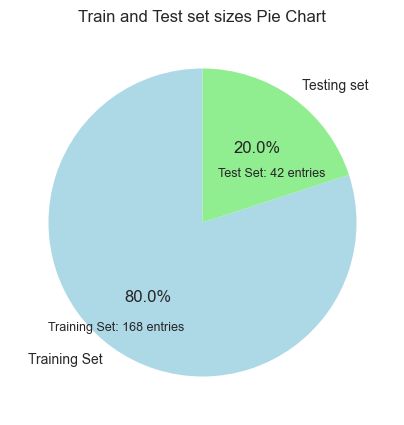

Test set size:  42
Training set size:  168


In [37]:
# 1.1
# Add necessary code here.
y = data['Type']
X = data.drop(columns = ['Type'])
#stratified split of X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

labels = ['Training Set', 'Testing set']

sizes = [train_size, test_size]
plt.figure(figsize = (5, 5))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['lightblue', 'lightgreen'])
plt.title('Train and Test set sizes Pie Chart')
plt.text(-1.0, -0.7, f"Training Set: {train_size} entries", fontsize=9)
plt.text(0.1, 0.3, f"Test Set: {test_size} entries", fontsize=9)
plt.show()

print("Test set size: ", test_size)
print("Training set size: ", train_size)

<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2** .....................

I am going to use Robust scaler for my dataset to mitigate the effects of outliers and to still standardize it based around 0 for easier use. This will mitigate noise from sample collection in the model on the extremes. I am going to utilize this model because the models we are creating arent based solely off calculating distances. 

Preprocessing pieplines optimize the performance of our machine learning model. Scaling the data is crucial to ensure that the relationships built open them are matching. Simple examples of this are ensuring metric consistency between measurments or making them centered about a certain value.

Examples of preprocessing methods for scaling include, StandardScaler, RobustScaler, MinMaxScaler, and Normalizer. 

Standard Scaler is utilzied to tranform data to have a media of zero and a standard deviation of one. This helps standardize the data so it can scale easily.

Robust scaler is utilized to mitigate the impact of outliers on the data. It utilizes the median data and the interquartile range of the feature vector( Q3 -Q1). This lessens the impact of outliers on the new scaled data.

Minmax scaler typically scales the features to be between 0 and 1. It is good to create bounded area however, it is very prone to outliers. It specificially utilizes the min and max of the feature vector to create the scaling. 

Lastly, normalizer method creates vector depending on the magnitude of the feature. This is particularly useful for text classifications or clustering where cosine similarity is used. It is very useful if distances are going to be used in the model.

Therefore, I will utilize Robust Scaler for its good performance with outliers.

In [38]:
# implement  Robust Scalaer on data: X_train, X_test, y_train, y_test
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.


In [39]:
# 1.3
# Add necessary code here.
# do SVM
from sklearn.svm import SVC

SVCModel = SVC()


<font color='Green'><b>Answer:</b></font>

- **1.3** .....................
I am choosing to do SVC since the amount of feature dimensions we have is not very high and we also have a reduced amount of data samples in total less than 300, this means that we cannot use complex models that require lots of training data like Neural Networks.  I want to be able to model slightly more complex data inputs in more complex and higher dimensionality. Logistic Reggression only produces linear decision boundaries by default, but can be extended to handle non-linear boundaries using techniques like polynomial or kernelized logistic regression. SVC can produce both linear and non-linear decision boundaries, depending on the choice of kernel function, therefore it is a great candidate when the complexity of the data is not that high and when there aren't scalability concerns as there are here since we have a relatively small sample size with a relatively small feature size as well. This makes it a good candidate, alternatively decision tree classification could work and be very interpretable however, I would like to use SVC since the data is relatively balanced.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [40]:
# 1.4
# Add necessary code here.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

grid_search = GridSearchCV(SVCModel, param_grid, cv = 5, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters are: ", grid_search.best_params_)

Best parameters are:  {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


<font color='Green'><b>Answer:</b></font>

- **1.4** .....................

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [41]:
# 1.5
# Add necessary code here.

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

grid_search_pca = GridSearchCV(SVCModel, param_grid, cv = 5, n_jobs = -1)
grid_search_pca.fit(X_train_pca, y_train)

print("Best parameters with PCA: ", grid_search_pca.best_params_)

# compare the accuracy of the model with these PCA parameters to the model without PCA
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test_scaled)
y_pred_pca = grid_search_pca.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy without PCA : ", accuracy)
print("Accuracy with PCA : ", accuracy_pca)

# other metrics
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
report_pca = classification_report(y_test, y_pred_pca)
print("Classification report without PCA : \n", report)
print("Classification report with PCA : \n", report_pca)



Best parameters with PCA:  {'C': 10, 'coef0': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
Accuracy without PCA :  0.9285714285714286
Accuracy with PCA :  0.9047619047619048
Classification report without PCA : 
               precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        14
           3       0.82      1.00      0.90        14

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42

Classification report with PCA : 
               precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.88      1.00      0.93        14
           3       0.93      0.93      0.93        14

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90 

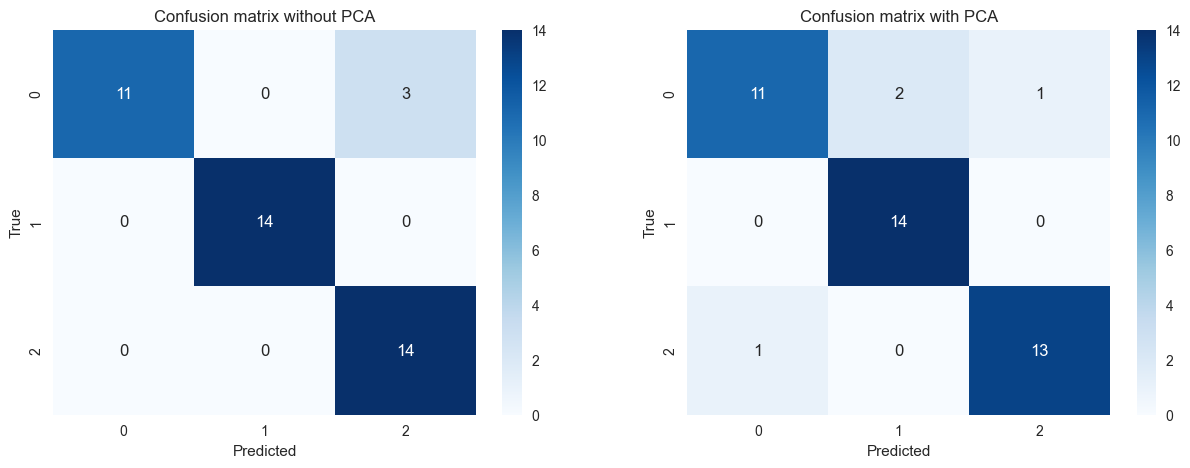

In [42]:
# make confusion matrices for both
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# display the confusion matrices with subplots
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

import seaborn as sns
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', ax = ax[0])
ax[0].set_title("Confusion matrix without PCA")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(conf_matrix_pca, annot = True, fmt = 'd', cmap = 'Blues', ax = ax[1])
ax[1].set_title("Confusion matrix with PCA")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

plt.show()
# print("Confusion matrix without PCA : \n", conf_matrix)
# print("Confusion matrix with PCA : \n", conf_matrix_pca)

<font color='Green'><b>Answer:</b></font>

- **1.5** .....................

I chose to utilize PCA as it works well with the Scaler I utilized additionally, it may look for collinearity for features which have a very high correlation as I assume some of the dataset will have since area, perimeter, coupled with the length and width of the kernerl will have. PCA will reduce the dimensionality of the dataset while preserving as muhc of the variance as possible. PCA is a technique used to reduce the dimensionality of a dataset by transforming the original features into a new set of orthogonal features, called principal components, which capture the maximum variance in the data. It works by calculating the covariance matrix, performing eigenvalue decomposition, and selecting the top eigenvectors to project the data onto a lower-dimensional subspace. Since the best model had a linear correlation I assume it will be a good fit.

This is then reflected in the models performance with the PCA and non PCA data for the data dimension reduction. As can be seen above the raw accuracy scores for both are very high, the accuracy without PCA is 0.92857142857 and the accuracy with PCA is 0.9047619047619048. The classification reports are also still very good with the dimension reduction. This is reflected through the high f1-score and the relatively high precision and recall scores. This is evident since for the original nonPCA data set (normal one), the precision was 1.0 for classes 1 and 2 and still 0.82 for class 3. Additionally, for the normal datasets recall, it was 0.79 , 1.0, and 1.0 for classifications 1,2, and 3 respectiviely. The f1 scores for the non PCA data was also very high at approximately 0.88,1.00, and 0.90 for the same classifications respectively. This suggests that the model is performing very well and the slight deviations can be attributed to a misclassfication of classification 3 into 1. Type 2 was perfectly categorized.  Overall, this makes our model very good.

The model which utilized the PCA model to fit and then used this data for the prediction still had very good results for precision, recall, and f1-score. This led to a precision score of 0.92,0.88, and 0.93 for classifications 1,2, and 3 respectively. Additionally, the recall was 0.79,1.00, 0.93 respectively. and the f1-score was 0.85,0.93, and 0.93 for classifications 1,2, and 3 respectively. These metrics are still very good reflecting pretty good modelling. This suggests that the model's dimensions can be reduced which is benefitial for interpretability and future classifications potentially. That being said SVC has such good scaling that it would be fine, since it is not computationally heavy (for few dimensions).

I also included a confusion matrices as well for both to be able to visually compare their results.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

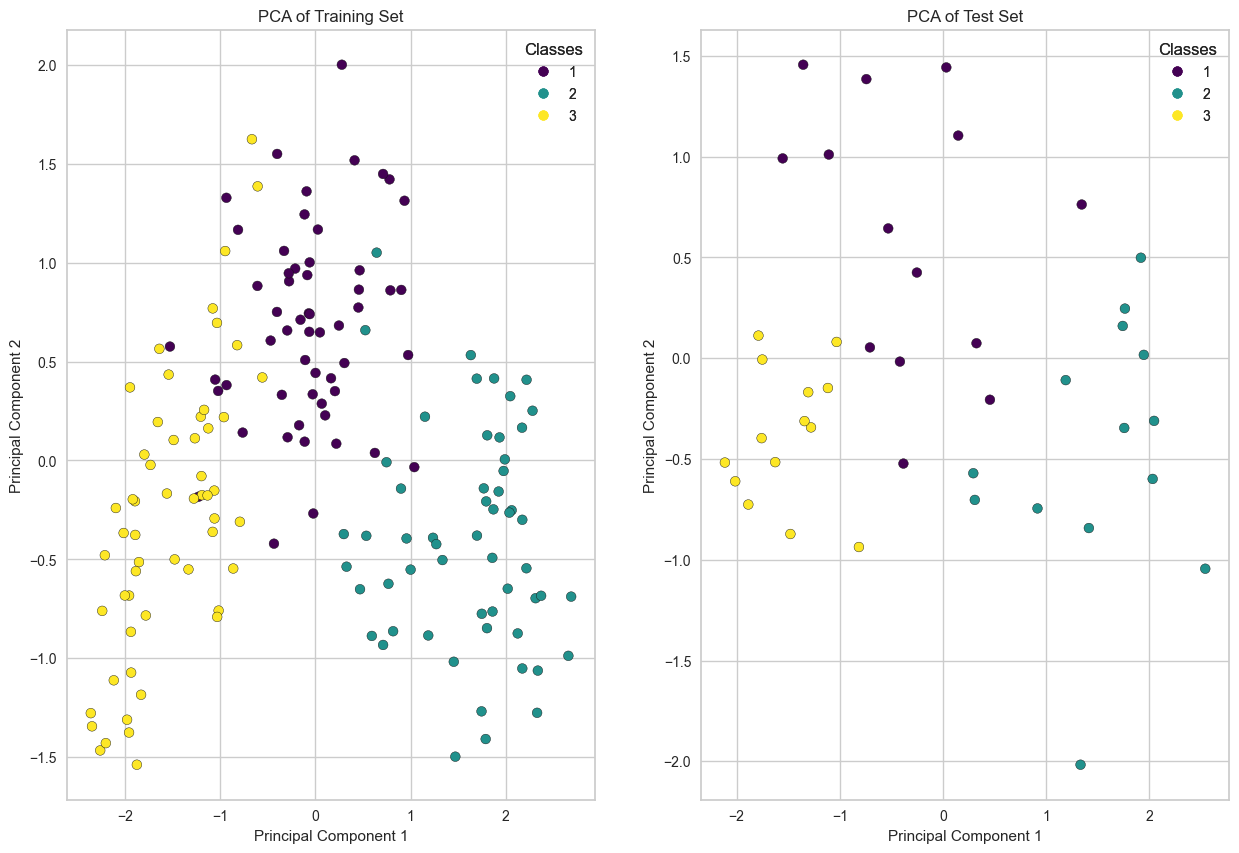

In [43]:
# 1.6
# Add necessary code here.

fig, ax = plt.subplots(1, 2, figsize = (15, 10))

scatterplot = ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, cmap = 'viridis', edgecolor = 'k')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].set_title('PCA of Training Set')
ax[0].add_artist(ax[0].legend(*scatterplot.legend_elements(), title = 'Classes'))


scatterplot2 = ax[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, cmap = 'viridis', edgecolor = 'k')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].set_title('PCA of Test Set')
ax[1].add_artist(ax[1].legend(*scatterplot2.legend_elements(), title = 'Classes'))


plt.show()

## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

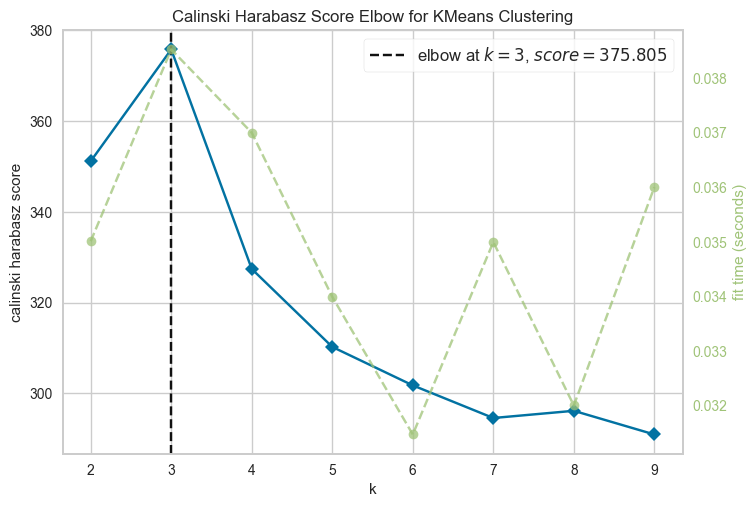

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [44]:
# 2.1
# Add necessary code here.

from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_init=10 ))
])


visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k = (2, 10), metric = 'calinski_harabasz')
visualizer.fit(X)
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1** .....................

The KElbowVisualizer is utilized to visually determine the optimal number of clusters for KMeans clustering. THe KElbowVisualizer is fit for the data X, this works by calculating the calinski_harabasz to determine the optimal number of clusters. The blue line represents the Calinksi-Harabsz scores for different values of k( the number of clsuters), and the green dotted line shows the standard deviation of the scores across multiple runs. As can be seen in the graph the Calinski harabasz score is at its highest for k number of groups. Here the clainksi score has sharply increased to a value of 375.805 with a k value of 3 (3 clusters). The standard deviation for the scores across multiple runs is quite low at this poimt as well. Overall this suggests that the optimal number of clusters is thus 3. 

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [45]:
# 2.2
# Add necessary code here.

optimal_k = visualizer.elbow_value_
print(optimal_k)

#update the pipeline with the correct number of clusters and then label the data

pipeline.set_params(kmeans__n_clusters = optimal_k)
pipeline.fit(X)

labels = pipeline.predict(X)

3


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [46]:
# 2.3
# Add necessary code here.
#Applying the PCA to reduce dimensionality of the dataset to 2D

pca = PCA(n_components = 2)

X_PCA = pca.fit_transform(X)


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

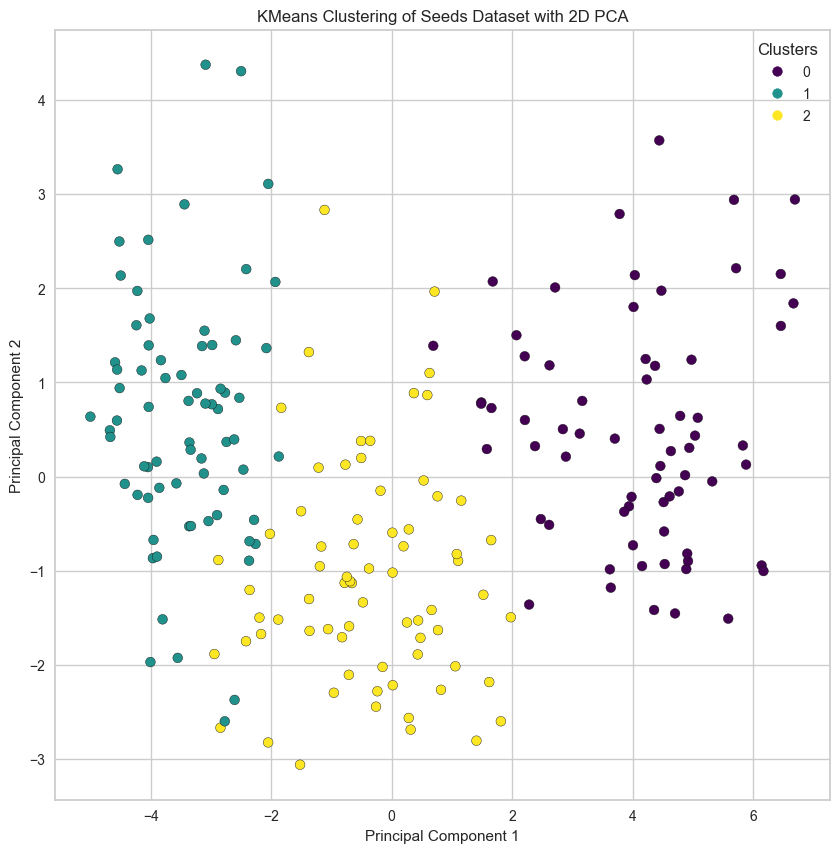

In [47]:
# 2.4
# Add necessary code here.

# create the 2D scatterplot fo the PCA-reduced data.

plt.figure(figsize = (10, 10))

scatterplot = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c = labels, cmap = 'viridis', edgecolor = 'k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Seeds Dataset with 2D PCA')
plt.legend(*scatterplot.legend_elements(), title = 'Clusters')
plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** .....................

The results demonstrate relatively good separation regarding the PC2 and PC1 separation to classify the 3 cluster groups. It looks like they are generally separated based on the Principal Component 1 in this example. There is slight overlap with clusters 0 and 1 at principal component 1 less than -2 and a principal component2 less than -0.8. The separation of the results is then relatively clean with little overlap for clusters 1 and 2. This tends to be defined for most points for values of principal component 1 greater than 2 are cluster 2 with some cluster 2 values overlapping at values of principal component 2 greater than 0.  This separation is more clear. Attributing this later on for the minimal overlapping and visually clear separation groups can be attributed to dimensions that can be reduced with little information lost. This suggests that the slight noise they have on these cluster separation is minimal. Overall we can see clear separations being defined based on the principal component 1 here at (-inf, -2) being mostly cluster 1 and then between (-2, 2) of the principal component 1 the cluster is mostly 0, and then any principal component 1 with value greater than 2 is always cluster 2. There is slight overlap that can be attributed to the principal component2 however, they are less noticeable. This can be seen as aforementioned. 

The overlap in clusters 1 and 0 could be caused by the relationship between the features being too complex to be modeled in 2 dimensions and thus for this dimension it appears as if it were noise. This can be fixed by doing a dimension reduction to a higher dimension. The very prominent distribution of the clustering groups about the principal componenet 1 origin could uggest that the features as much as cluster group 2. and cluster group 1 which are very far.